In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [4]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# normalize
x_train = x_train / 255
x_test = x_test / 255

In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


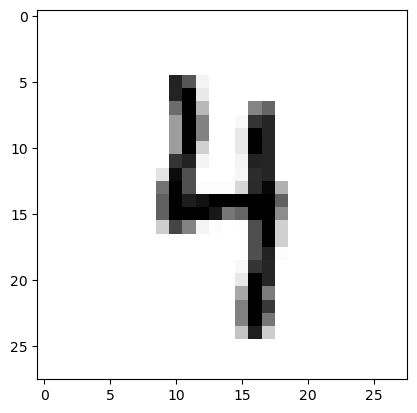

In [10]:
plt.imshow(x_train[1110], cmap = 'Greys')

In [18]:
# multinomial logistic regression
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax')
])

In [20]:
model_lr.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_lr.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

Train on 60000 samples
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4745 - accuracy: 0.8755


In [32]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax')
])

model_lr.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_lr.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
history_lr = model_lr.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test), verbose = False)

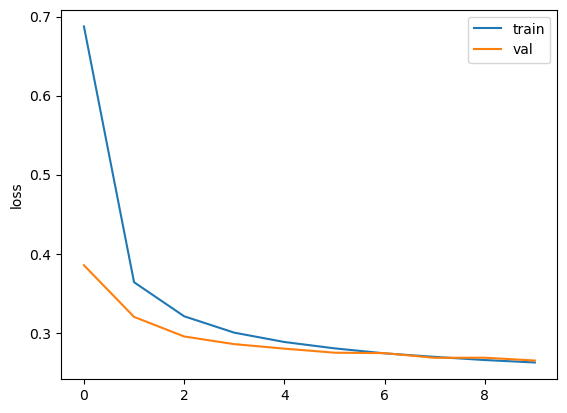

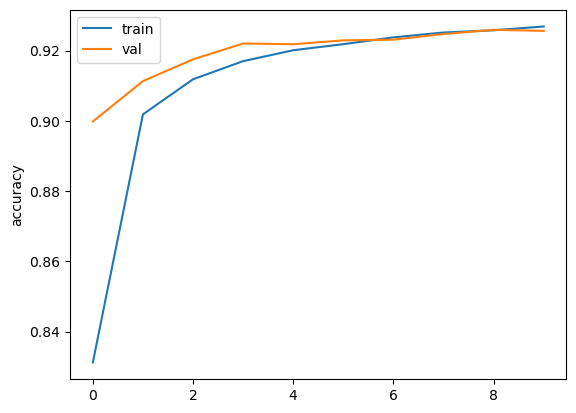

In [35]:
plt.plot(history_lr.history['loss'], label = 'train')
plt.plot(history_lr.history['val_loss'], label = 'val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label = 'train')
plt.plot(history_lr.history['val_accuracy'], label = 'val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

[9.9309318e-06 2.6344890e-10 2.9878767e-05 4.5256633e-03 5.7667131e-07
 2.9338833e-05 1.7381205e-09 9.9484032e-01 2.8403050e-05 5.3595763e-04]  =>  7


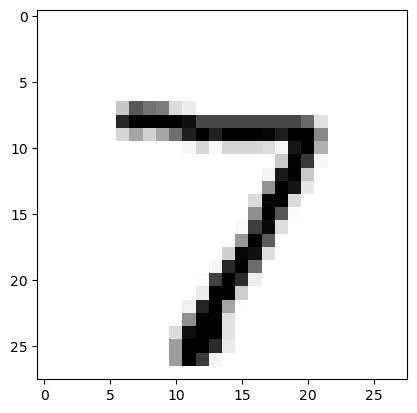

[3.2351312e-04 3.3956819e-06 9.9386793e-01 4.8150180e-04 4.0922528e-13
 2.3154819e-03 2.9105607e-03 4.9340834e-15 9.7641081e-05 1.2853393e-11]  =>  2


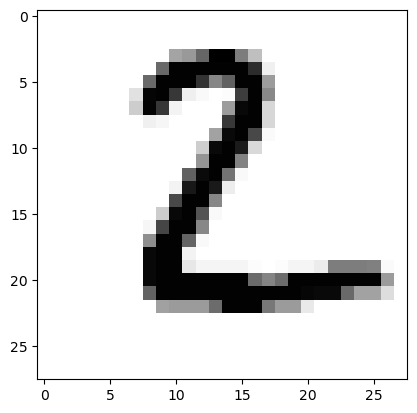

[5.8533351e-06 9.7235572e-01 1.4782716e-02 3.2219649e-03 2.1387386e-04
 8.4625866e-04 1.3742241e-03 2.1519912e-03 4.6062400e-03 4.4105391e-04]  =>  1


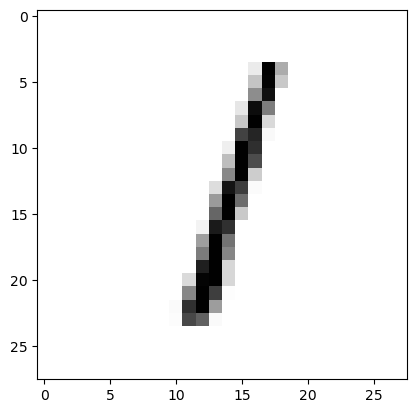

[9.9969292e-01 5.7443994e-11 8.9190238e-05 3.5487101e-06 4.3656375e-08
 7.3558782e-05 8.1706778e-05 1.8333887e-05 2.0724025e-05 2.0079384e-05]  =>  0


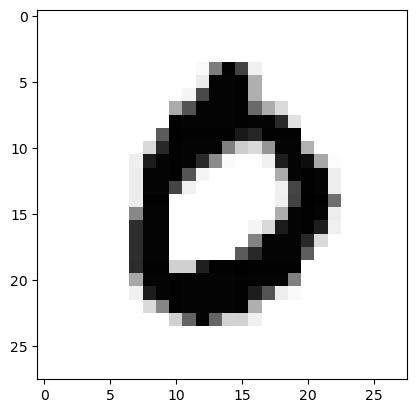

[3.7392793e-04 1.1177577e-06 2.2819215e-03 6.1459134e-05 9.5822608e-01
 1.7200662e-04 1.8499790e-03 3.9558597e-03 4.7753011e-03 2.8302567e-02]  =>  4


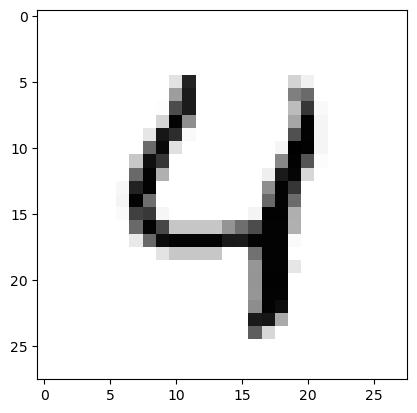

In [39]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis = 1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap = 'Greys')
    plt.show()

In [41]:
model_mlp = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(64, activation = 'elu'),
    layers.Dense(64, activation = 'elu'),
    layers.Dense(10, activation = 'softmax')
])

model_mlp.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_mlp.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [42]:
history_mlp = model_mlp.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test), verbose = False)

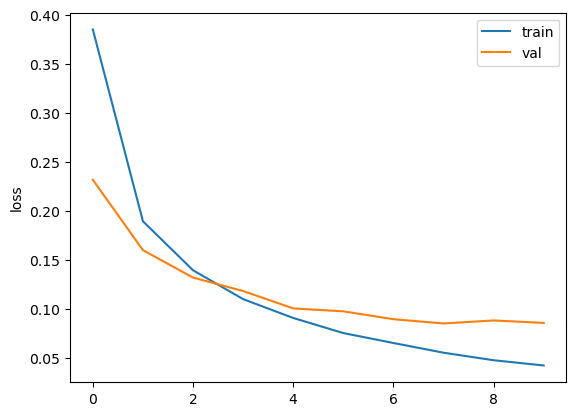

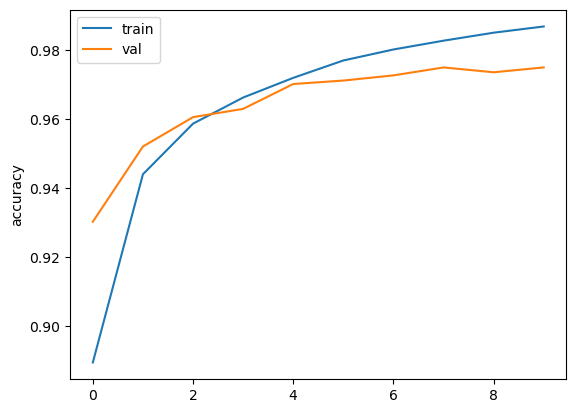

In [43]:
plt.plot(history_mlp.history['loss'], label = 'train')
plt.plot(history_mlp.history['val_loss'], label = 'val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label = 'train')
plt.plot(history_mlp.history['val_accuracy'], label = 'val')
plt.ylabel('accuracy')
plt.legend()
plt.show()